In [130]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, KFold
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
sns.set()
%matplotlib inline

In [98]:
#Read train& test data

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv('test.csv')
train_df=train_df.drop(['ID_code'], axis=1)
test_df=test_df.drop(['ID_code'], axis=1)


In [99]:
train_df.info(), df_test.info()   # Memory Usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, target to var_199
dtypes: float64(200), int64(1)
memory usage: 306.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


(None, None)

In [100]:
train_df.shape, test_df.shape    # Dimensions of train and test Data

((200000, 201), (200000, 200))

In [101]:
train_df.describe()   # Shows statistics history 

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [102]:
train_df  # Print train in dataframe

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,0.1202,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,-2.1926,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


## Data Type
We will check the datatype of all the feaures in both train and test.



In [103]:
pd.DataFrame(train_df.dtypes).transpose()


,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [104]:
pd.DataFrame(test_df.dtypes).transpose()


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


## Missing Value
Analysing the missing value of features. So we can do imputaiton if any missing value present in any feature. As data set is imblance, we will use cross-validation instead of traditional train test split.

In [105]:
def missingcount(count, samples):
         return (int(count) /samples) * 100
    
def missingPercent(df):
        count_df = pd.DataFrame(df.isnull().sum(axis=0).reset_index())
        count_df.columns = ['FEATURE', 'MISSING_COUNT']
        count_df["MISSING_%"] = count_df["MISSING_COUNT"].map(lambda x: missingcount(x, df.shape[0] ))
        return count_df.set_index('FEATURE')

In [106]:
# Training set

missingPercent(train_df) 


,MISSING_COUNT,MISSING_%
FEATURE,,
target,0,0.0
var_0,0,0.0
var_1,0,0.0
var_2,0,0.0
var_3,0,0.0
...,...,...
var_195,0,0.0
var_196,0,0.0
var_197,0,0.0


In [107]:
# Test set

missingPercent(test_df)


,MISSING_COUNT,MISSING_%
FEATURE,,
var_0,0,0.0
var_1,0,0.0
var_2,0,0.0
var_3,0,0.0
var_4,0,0.0
...,...,...
var_195,0,0.0
var_196,0,0.0
var_197,0,0.0


As per the above analysis, Train and Test don't have any missing value. So we don't need to perform any imputation for handling the missing values.

In [123]:
train_df.groupby('target').size()   # Distribution of target value in train data

target
0    179902
1     20098
dtype: int64

This is giving more insight of data.

-  Standard Deviation is relatively large for both train and test set.
-  Max, Min and STD are quite close in both train and test data set.
-  Min is distibuted over the large number of range.

## Data Visualization¶
Visualization will help us to understand distribution. It's most important part of EDA. Every thing in the world, we can understand better if we have Visualization for it.

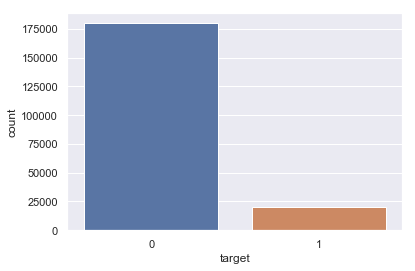

In [132]:
fig=sns.countplot(x='target',data=train_df)    # Distribution of target value in train data


Distribution of Mean and Standard Deviation


In [111]:
features = [c for c in train_df.columns if c not in ['ID_code', 'target']]

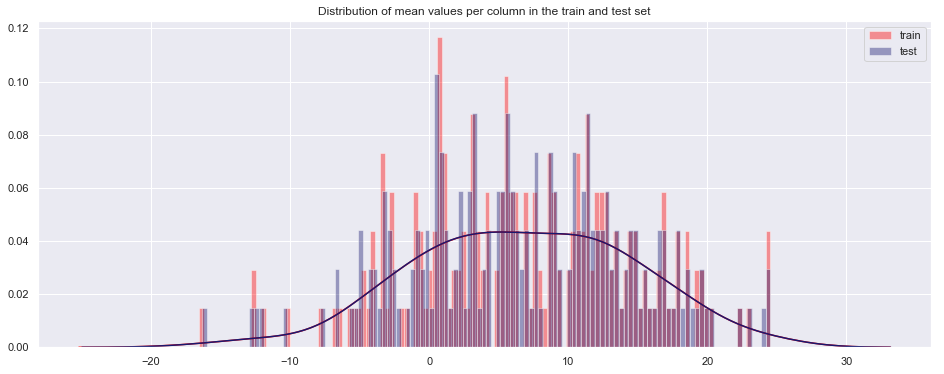

In [137]:
#Distribution of mean values per column in the train and test set

plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train and test set")
sns.distplot(train_df[features].mean(axis=0),color="red", kde=True,bins=120, label='train')
sns.distplot(test_df[features].mean(axis=0),color="midnightblue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

Distribution for Standard Deviation

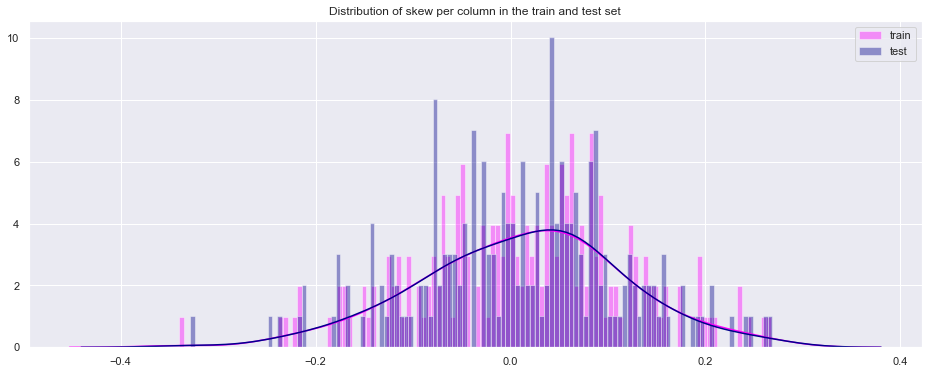

In [133]:
#Distribution of skew per column in the train and test set

plt.figure(figsize=(16,6))
plt.title("Distribution of skew per column in the train and test set")
sns.distplot(train_df[features].skew(axis=0),color="magenta", kde=True,bins=120, label='train')
sns.distplot(test_df[features].skew(axis=0),color="darkblue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

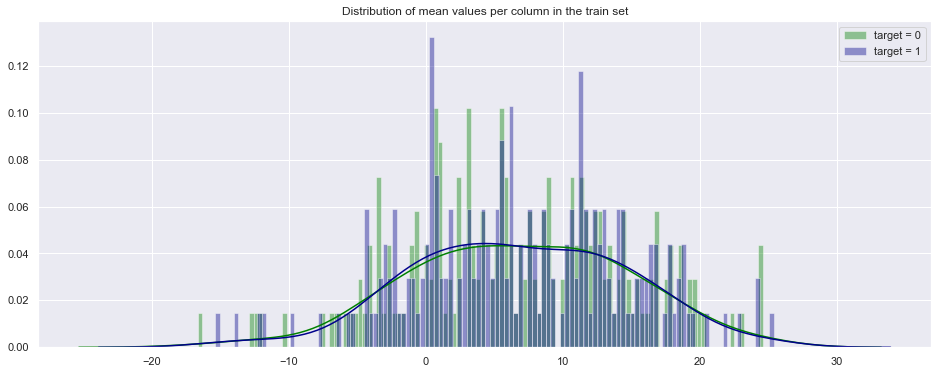

In [135]:
#Distribution of mean values per column in the train set

plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train set")
sns.distplot(t0[features].mean(axis=0),color="green", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].mean(axis=0),color="darkblue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

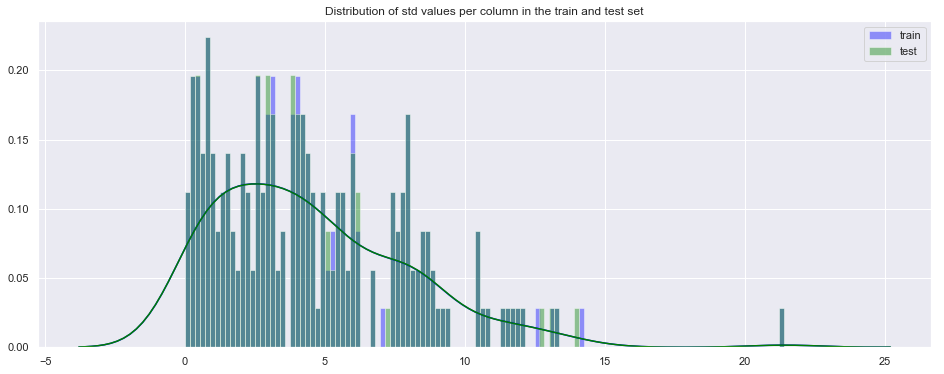

In [138]:
# Distribution of std values per column in the train and test set

plt.figure(figsize=(16,6))
plt.title("Distribution of std values per column in the train and test set")
sns.distplot(train_df[features].std(axis=0),color="blue",kde=True,bins=120, label='train')
sns.distplot(test_df[features].std(axis=0),color="green", kde=True,bins=120, label='test')
plt.legend()
plt.show()


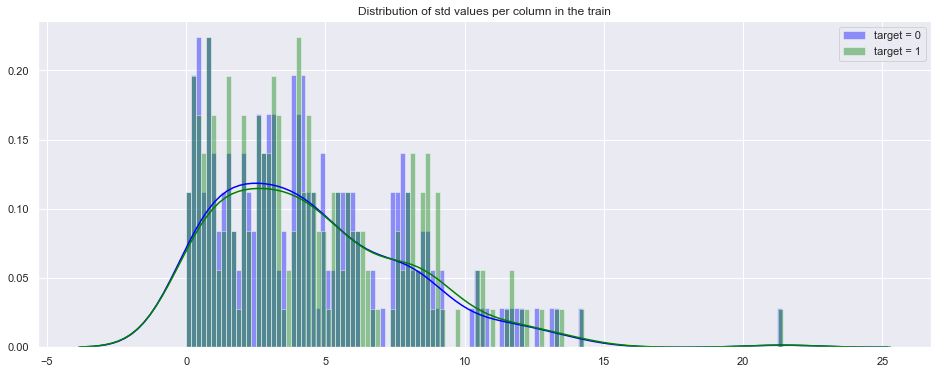

In [140]:
# Distribution of std values per column in the train

t0 = train_df.loc[train_df['target'] == 0]
t1 = train_df.loc[train_df['target'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per column in the train")
sns.distplot(t0[features].std(axis=0),color="blue",kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].std(axis=0),color="green", kde=True,bins=120, label='target = 1')
plt.legend()
plt.show()

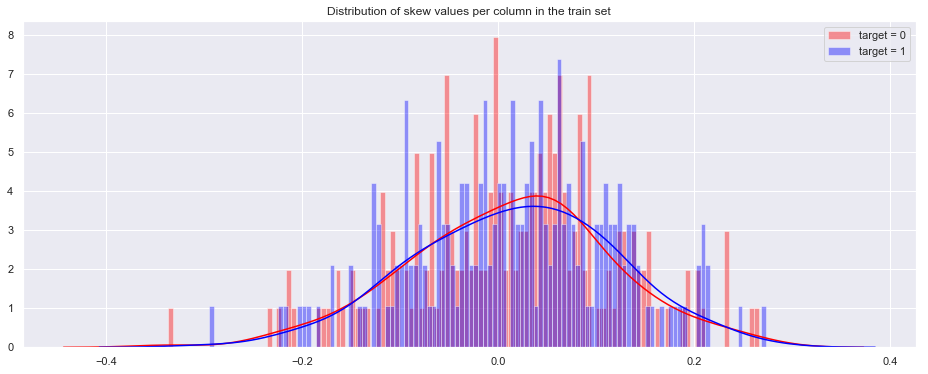

In [139]:
# Distribution of skew values per column in the train set

t0 = train_df.loc[train_df['target'] == 0]
t1 = train_df.loc[train_df['target'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of skew values per column in the train set")
sns.distplot(t0[features].skew(axis=0),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].skew(axis=0),color="blue", kde=True,bins=120, label='target = 1')
plt.legend()
plt.show()

## Data Relationships
Visualizaiton of data relationship, will help us to understand the degree of correlation between features and the dependencies. With the help of scatterplot and heatmap we can show the relationship of features.

In [115]:
corr=train_df.iloc[:,:20].corr()

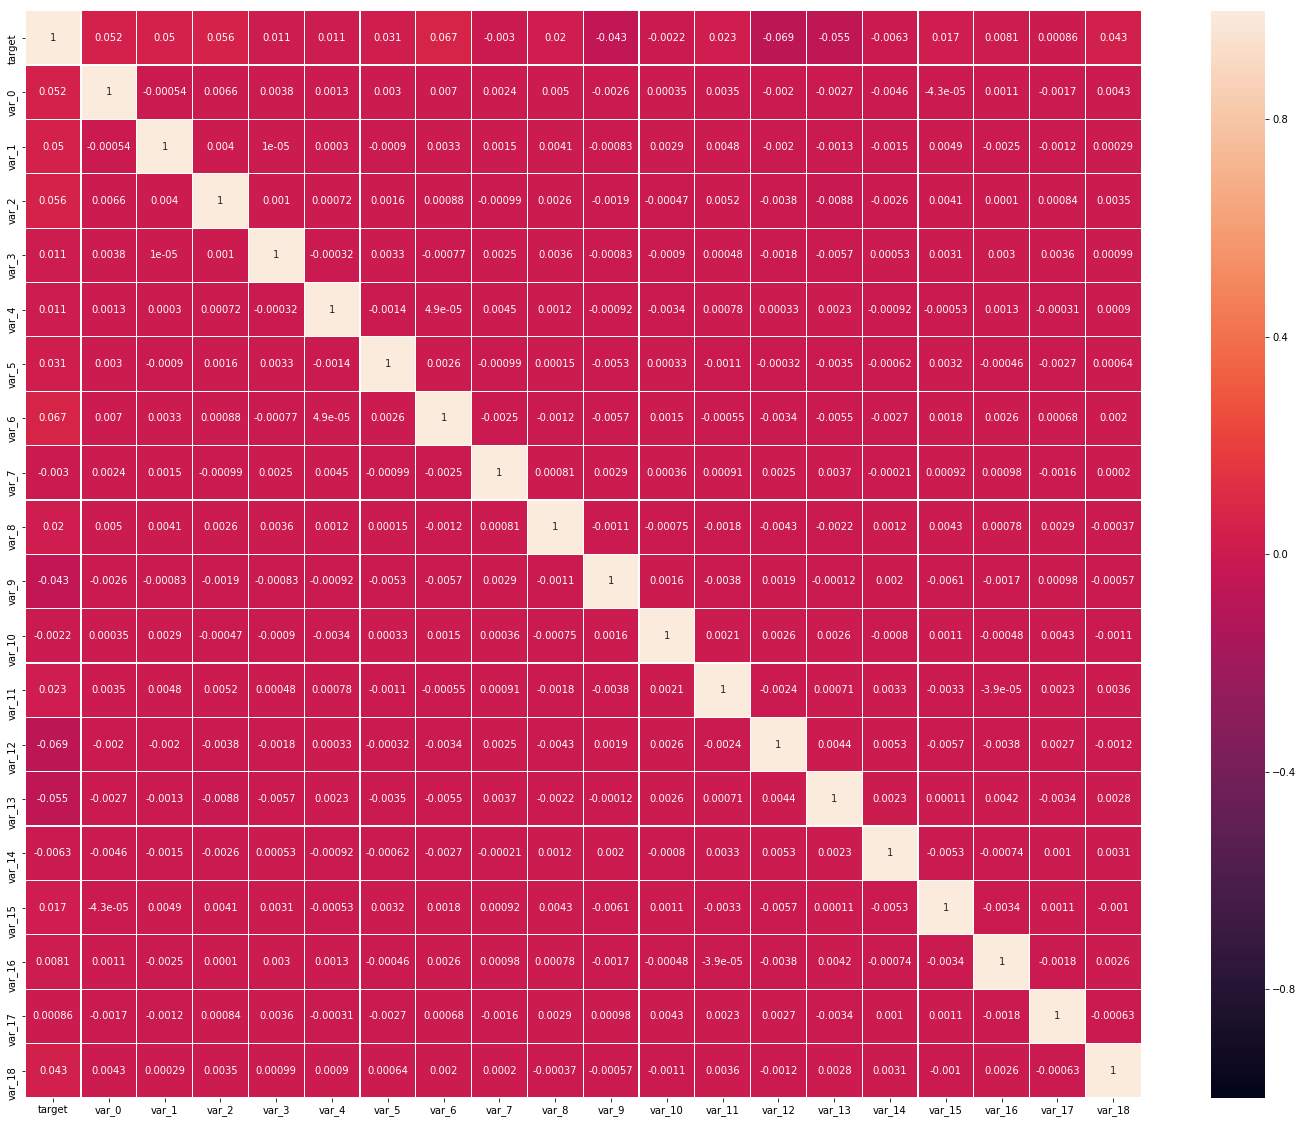

In [116]:
# Set the matplotlib figure 
fig, ax=plt.subplots(figsize=(25,20))

# Draw the heatmap
_= sns.heatmap(corr,  ax=ax, annot=True,   vmin=-1, linewidths=0.2)